In [1]:
import scanpy as sc
import numpy as np
import csv
import pickle
import matplotlib
import math
from itertools import combinations
import itertools
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pyvis.network import Network
import networkx as nx
from networkx.algorithms import bipartite
from cdlib import algorithms
from cdlib import NodeClustering
import altair as alt
import sys
import os
sys.path.append("/Users/victoriagao/Documents/MSc/Schwartz_lab/altair-themes/")
if True:  # In order to bypass isort when saving
    import altairThemes

Note: to be able to use all crisp methods, you need to install some additional packages:  {'bayanpy', 'wurlitzer', 'infomap', 'graph_tool'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap'}


In [19]:
# Read in the whole log odds table
global_log_odds_df = pd.read_csv('/Users/victoriagao/local_docs/NEST/output/LR_log_odds/10.5_new/exp2_B1_Global_log_odds.csv')

output_folder = "/Users/victoriagao/local_docs/NEST/output/gsea_results/"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

In [20]:
global_log_odds_df

,L-R Pair,log_odds_ratio,tumor counts,non-tumor counts
0,TGFB1-ITGB5,2.948865,83,277
1,TGFB1-ITGB6,4.522873,201,139
2,TGFB1-ERBB2,4.620066,200,126
3,TGFB1-ENG,2.144476,85,576
4,TGFB1-ACVRL1,-1.705633,2,53
...,...,...,...,...
2759,PPY-NMUR2,-inf,0,2
2760,PPY-CXCR2,-inf,0,2
2761,OXT-BDKRB1,-inf,0,2
2762,OXT-F2R,-inf,0,2


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

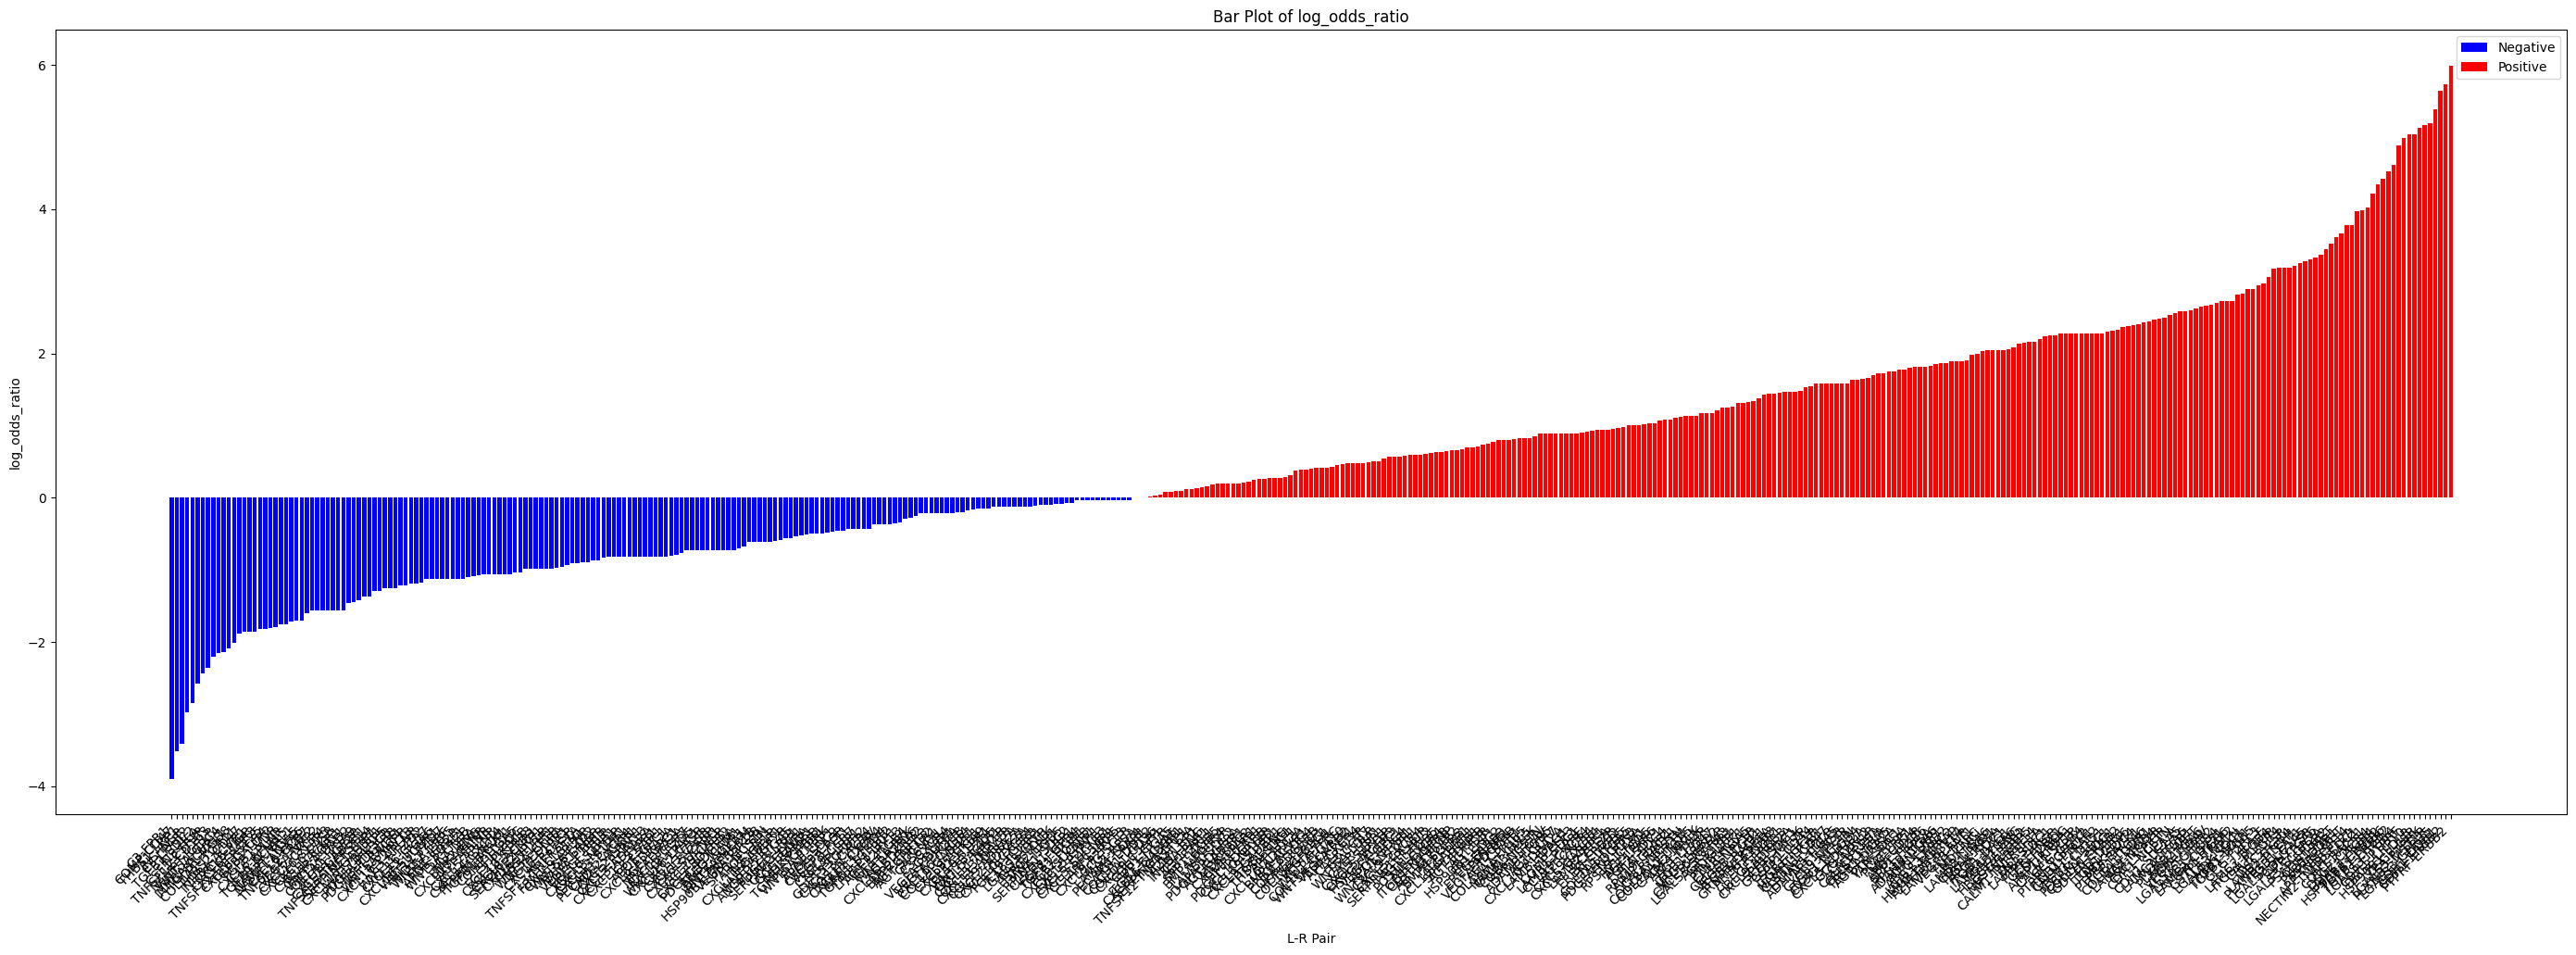

In [23]:
###### This only plots the non-infinitive log odds values
# Separate negative and positive values
negative_values = global_log_odds_df[(global_log_odds_df['log_odds_ratio'] < 0) & (global_log_odds_df['log_odds_ratio'] != -float('inf'))]
negative_values = negative_values.sort_values(by="log_odds_ratio")
# negative_values = log_odds_df[(log_odds_df['log_odds_ratio'] < 0) | (log_odds_df['log_odds_ratio'] == -float('inf'))]
positive_values = global_log_odds_df[(global_log_odds_df['log_odds_ratio'] > 0) & (global_log_odds_df['log_odds_ratio'] != float('inf'))]
positive_values = positive_values.sort_values(by="log_odds_ratio")

# Create tick mark list
# tick_list = pd.concat([negative_values["L-R Pair"],positive_values["L-R Pair"]])

# Create a bar plot
fig, ax = plt.subplots(figsize=(35, 11)) 
# fig, ax = plt.subplots()
ax.bar(negative_values['L-R Pair'], negative_values['log_odds_ratio'], color='blue', label='Negative')
ax.bar(positive_values['L-R Pair'], positive_values['log_odds_ratio'], color='red', label='Positive')

# Add labels, title, and legend
ax.set_xlabel('L-R Pair')
ax.set_ylabel('log_odds_ratio')
ax.set_title('Bar Plot of log_odds_ratio')
ax.legend()

# Rotate x-axis labels for better readability
# plt.xticks(tick_list,rotation=45, ha='right')
# plt.xticks(log_odds_df["L-R Pair"],rotation=45, ha='right')
plt.xticks(rotation=45, ha='right')
# plt.xticks(positive_values['L-R Pair'],rotation=45, ha='right')

In [24]:
output_file = '/Users/victoriagao/local_docs/NEST/output/new_bar_plot.png'
# plt.tight_layout()
plt.savefig(output_file)

<Figure size 640x480 with 0 Axes>

In [25]:
plt

<module 'matplotlib.pyplot' from '/Users/victoriagao/anaconda3/envs/testenv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [ ]:

# Get the L-R pair information from the first column of master_log_odds_df
LR_pairs_info = whole_log_odds_df.iloc[:, 0]

# Iterate through each column of master_log_odds_df, excluding the first column
for log_odds_values in whole_log_odds_df.iloc[:, 1:].items():
    
    negative_values = log_odds_df[(log_odds_df['log_odds_ratio'] < 0) & (log_odds_df['log_odds_ratio'] != -float('inf'))]

# negative_values = log_odds_df[(log_odds_df['log_odds_ratio'] < 0) | (log_odds_df['log_odds_ratio'] == -float('inf'))]
    positive_values = log_odds_df[(log_odds_df['log_odds_ratio'] > 0) & (log_odds_df['log_odds_ratio'] != float('inf'))]

    # Create tick mark list
    # tick_list = pd.concat([negative_values["L-R Pair"],positive_values["L-R Pair"]])

    # Create a bar plot
    fig, ax = plt.subplots(figsize=(35, 11)) 
    # fig, ax = plt.subplots()
    ax.bar(negative_values['L-R Pair'], negative_values['log_odds_ratio'], color='green', label='Negative')
    ax.bar(positive_values['L-R Pair'], positive_values['log_odds_ratio'], color='red', label='Positive')

    # Add labels, title, and legend
    ax.set_xlabel('L-R Pair')
    ax.set_ylabel('log_odds_ratio')
    ax.set_title('Bar Plot of log_odds_ratio')
    ax.legend()

    # Rotate x-axis labels for better readability
    # plt.xticks(tick_list,rotation=45, ha='right')
    # plt.xticks(log_odds_df["L-R Pair"],rotation=45, ha='right')
    plt.xticks(rotation=45, ha='right')

    


In [18]:

# Iterate through each column of the master_log_odds_df starting from the second column
for column_name, log_odds_values in whole_log_odds_df.iloc[:, 1:].items():
    # Select data for the current column
    # log_odds_df = whole_log_odds_df[[column]].dropna()
    log_odds_df = pd.DataFrame({column_name: log_odds_values})
    column_name = pd.DataFrame({column_name: column_name})

    # Concatenate the new DataFrame with the results DataFrame horizontally
    results_df = pd.concat([column_name, log_odds_df], axis=1)

    # Separate positive and negative values
    # negative_values = log_odds_values[(log_odds_values < 0) & (log_odds_values != -float('inf'))].sort_values(ascending=False)
    # positive_values = log_odds_values[(log_odds_values > 0) & (log_odds_values != float('inf'))].sort_values(ascending=False)
    negative_values = log_odds_df[(log_odds_df['log_odds_ratio'] < 0) & (log_odds_df['log_odds_ratio'] != -float('inf'))]
    # negative_values = log_odds_df[(log_odds_df['log_odds_ratio'] < 0) | (log_odds_df['log_odds_ratio'] == -float('inf'))]
    positive_values = log_odds_df[(log_odds_df['log_odds_ratio'] > 0) & (log_odds_df['log_odds_ratio'] != float('inf'))]

    # Create a bar plot
    fig, ax = plt.subplots(figsize=(35, 11))
    ax.bar(negative_values.index, negative_values, color='blue', label='Negative')
    ax.bar(positive_values.index, positive_values, color='red', label='Positive')

    # Add labels, title, and legend
    ax.set_xlabel('L-R Pair')
    ax.set_ylabel('log_odds_ratio')
    ax.set_title(f'Bar Plot of {column}')
    ax.legend()

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Save the plot to a file (optional)
    # You can save the plot to a file if needed.
    # Replace 'output_folder' and 'file_name' with your desired file path and name.
    # file_name = f"{column}_bar_plot.png"
    # plt.savefig(os.path.join(output_folder, file_name))

    # Show the plot (optional)
    # Uncomment the following line if you want to display the plot interactively.
    # plt.show()

# To close all plots after generating them (optional)
# plt.close('all')


ValueError: If using all scalar values, you must pass an index